# Regressão Linear - Projeto

Uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo mobile ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em aplicativos móveis ou em seu site.

## Imports de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

In [2]:
clientes = pd.read_csv(r"C:\Users\pimen\OneDrive\Documentos\Asimov\4. Data Science e Machine Learning com Python\Modelos de Classificação e Regressão\3. Regressão Linear em Dados de Ecommerce\ecommerce-customers")

In [3]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

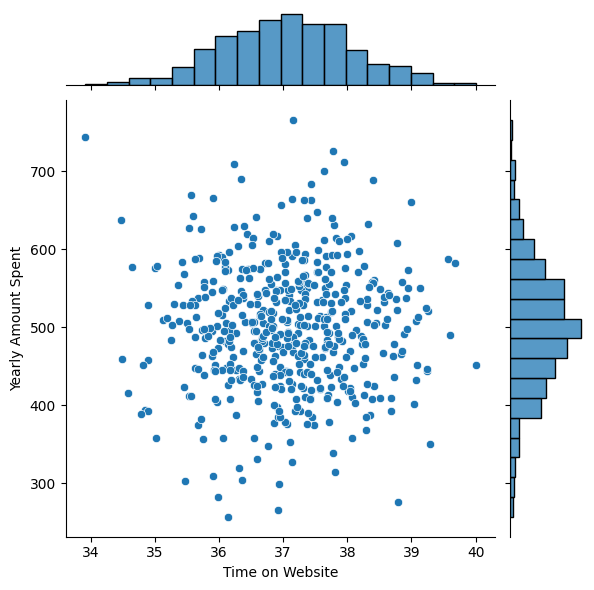

In [6]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data = clientes)

* Não aparenta uma correlação linear entre o tempo no site e o gasto anual médio
* O tempo médio no site talvez não diga muita coisa

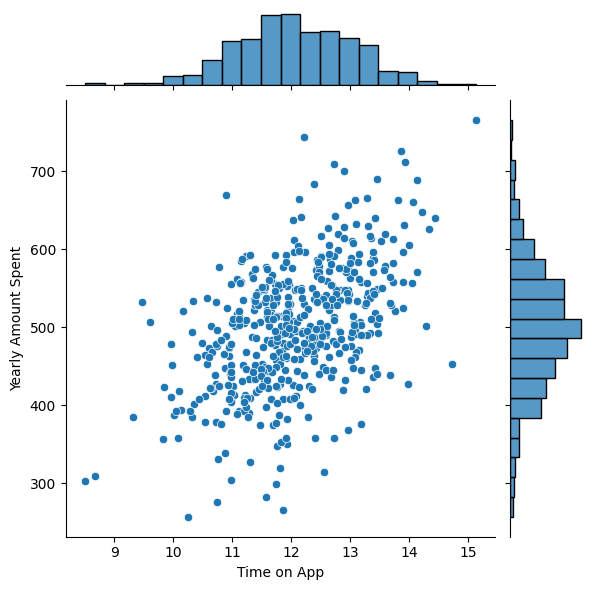

In [11]:
sns.jointplot(clientes,x="Time on App",y="Yearly Amount Spent")

* Aparentemente há uma correlação linear com o tempo no app e o valor anual médio
* Quanto mais tempo no app tende a ter maior valor médio anual

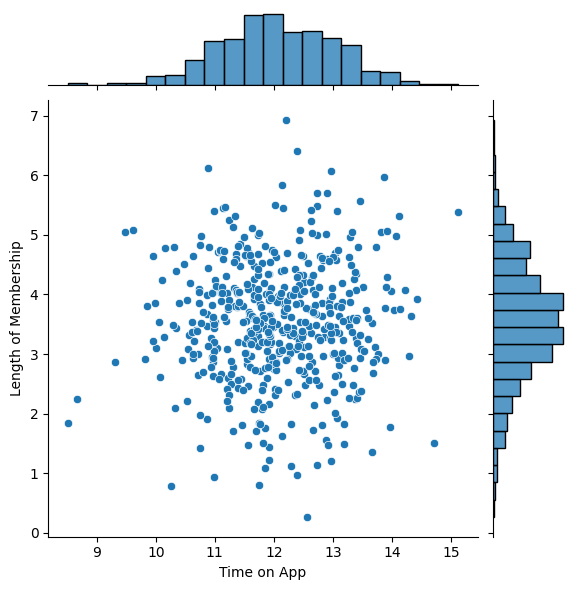

In [13]:
sns.jointplot(clientes,x="Time on App",y="Length of Membership")

* A princípio também não há uma relação linear entre o tempo no app e o tempo de membro

**Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores)***

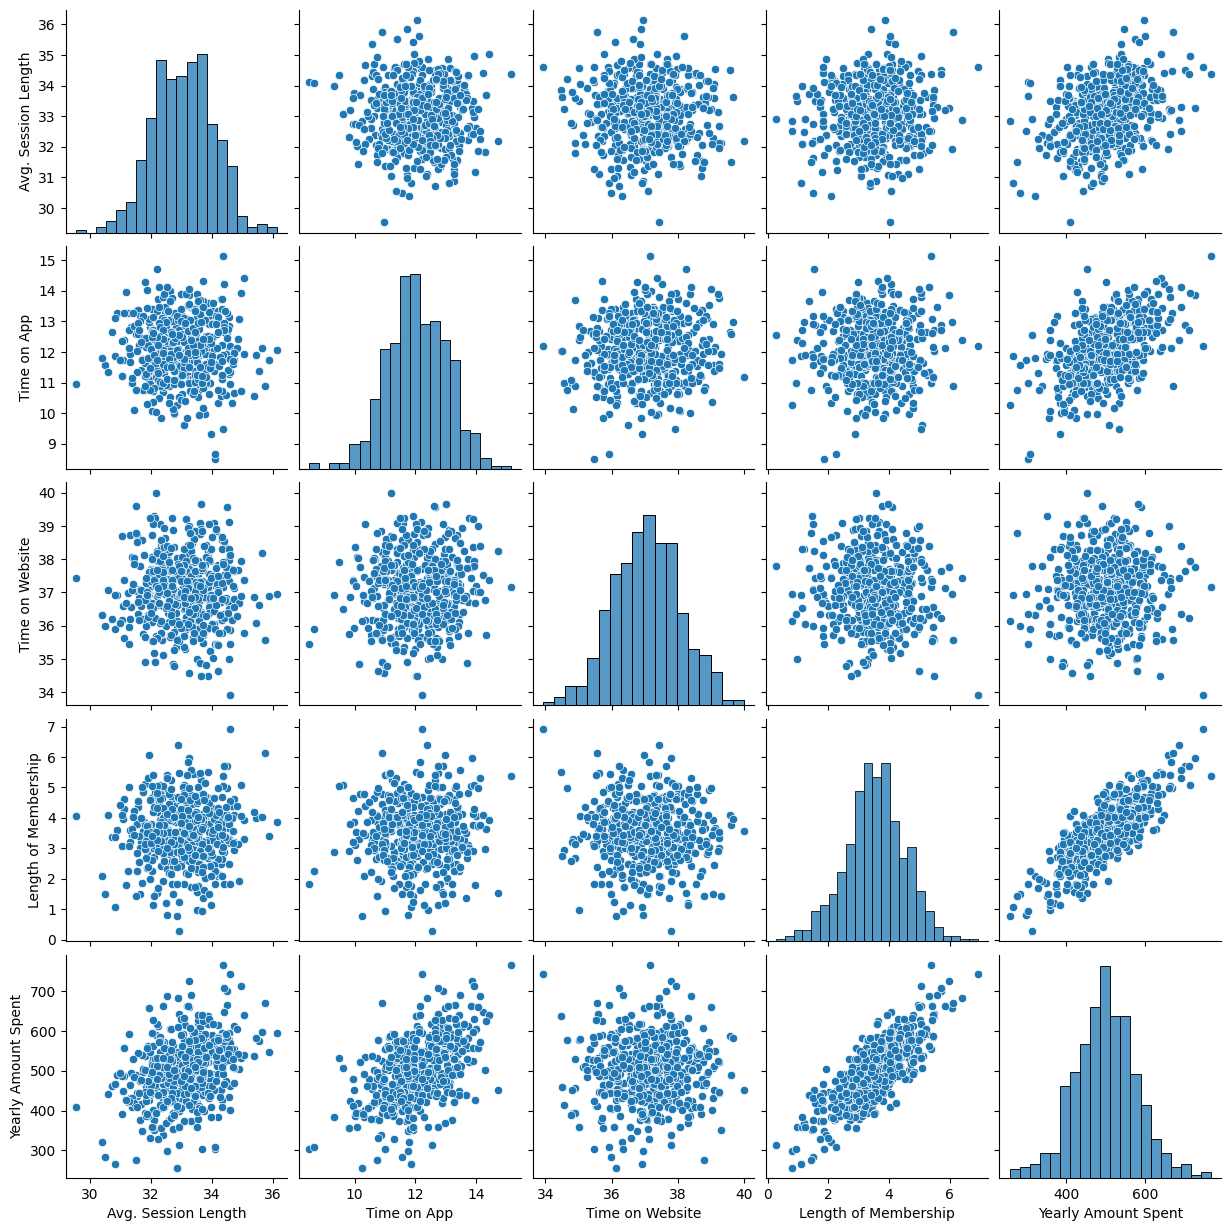

In [14]:
sns.pairplot(clientes)

C:\Users\pimen\AppData\Local\Temp\ipykernel_16236\611565992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clientes.corr(),annot=True)


<AxesSubplot: >

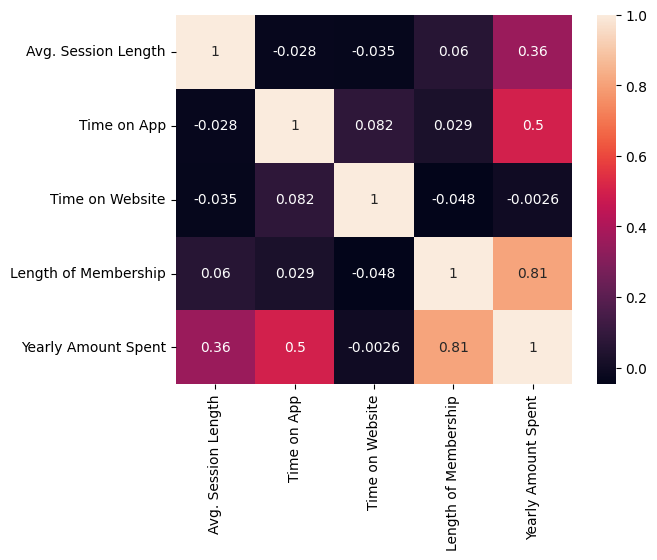

In [32]:
sns.heatmap(clientes.corr(),annot=True)

* O valor que mais influencia no valor anual gasto é o tempo de membro de cliente e o tempo no App.

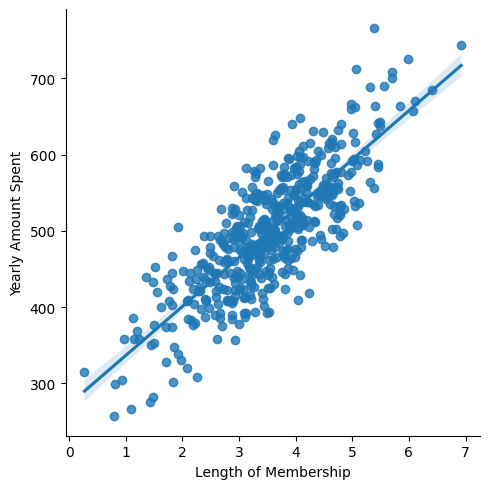

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=clientes)

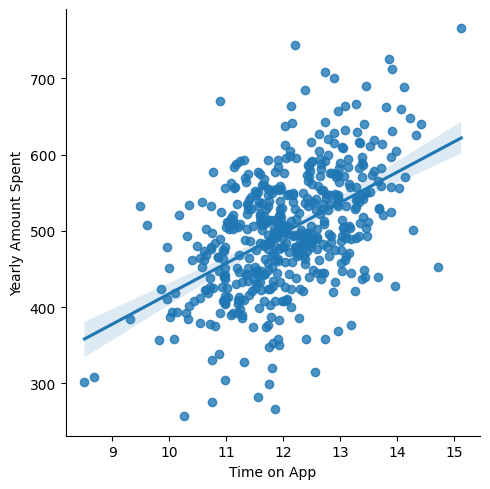

In [16]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=clientes)

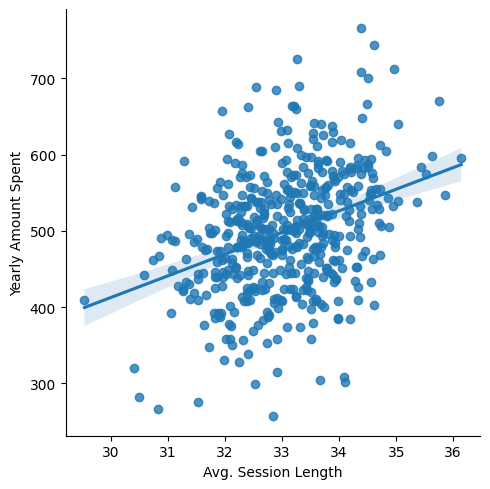

In [26]:
sns.lmplot(x='Avg. Session Length',y='Yearly Amount Spent',data=clientes)

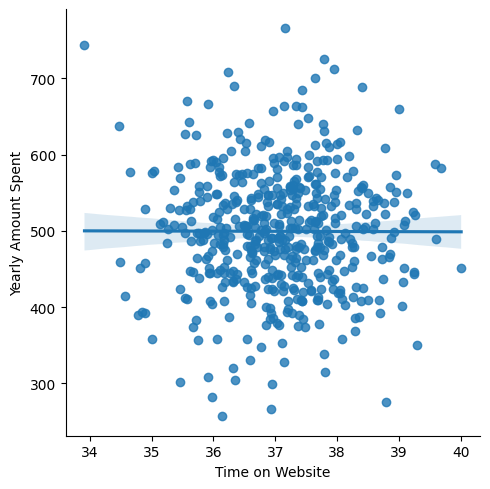

In [27]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=clientes)

* Podemos desconsiderar a informação de Time on Website, por aparentemente não apresentar uma relação linear

## Treinando e testando os dados

In [33]:
y = clientes['Yearly Amount Spent']
X = clientes[['Avg. Session Length','Time on App','Length of Membership']]

Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Treinando o modelo

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.987591
Time on App,38.609413
Length of Membership,61.269046


## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

Use lm.predict () para prever o conjunto X_test dos dados.

In [37]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Predicting test data')

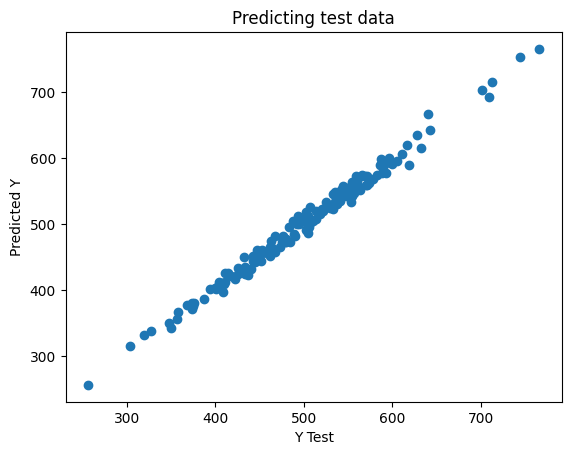

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.title("Predicting test data")

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas.

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.236949056091381
MSE: 80.19544609397619
RMSE: 8.955191013818531


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist ().

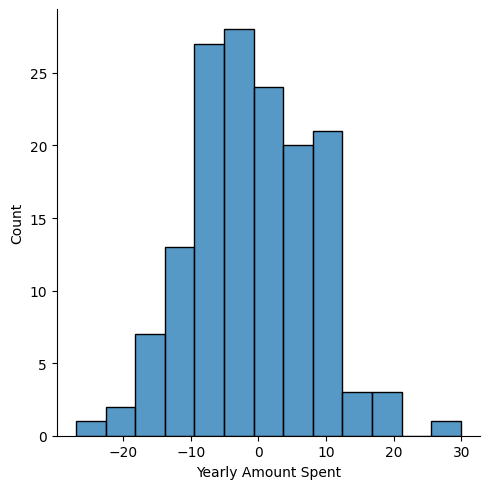

In [40]:
sns.displot((y_test-predictions))

## Conclusão

Levando em consideração os coeficientes: <br>
* Para cada uma unidade de tempo a mais na média de consultoria o valor médio anual varia $25.98
* Para cada minuto a mais no app o valor médio aumenta $38.59
* Para cada um ano de membro o valor aumenta $61.28

Assim, podemos concluir que a loja deve concentrar em campanhas de fidelização de clientes e em marketing no App